# Homework 6, JL transformations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2
import scipy.special as sp
from scipy.special import gamma
import math
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  16


## Question 1

### Question 1a

In [2]:
# vec
n = 1000
x = np.random.normal(0,1,n)
# l2
x_l2 = np.sqrt(np.dot(x,x))
print(x_l2)
# scale
x_norm = x / x_l2
# scaled l2 eq 1
print(np.sqrt(np.dot(x_norm, x_norm)))

30.782543033549494
1.0000000000000002


In [3]:
k=100
# Johnson-Lindenstrauss transformation matrix
def jl_matrix(n,k):
    return np.random.normal(0,1/np.sqrt(k),size = [k,n])

In [4]:
N=10000
# jl transformed x
z = []
for i in range(N):
    G = jl_matrix(n,k)
    y = G @ x_norm
    z.append(np.linalg.norm(y)**2)
z

[1.1101027524474616,
 1.0537755494674677,
 0.9456154895378812,
 1.0261546412134737,
 1.3014376153511522,
 1.206292176907018,
 1.2587516230022635,
 1.1206191663449792,
 0.9288568069732986,
 1.1238276422247933,
 0.690698051790427,
 0.8783876658534725,
 0.9426972254807142,
 0.7670340237252056,
 0.8268787828217216,
 0.9893759385942715,
 1.0388426600558172,
 1.07619566976604,
 1.2765333964720431,
 0.9283183038679242,
 0.9703130551963794,
 0.8740894222968996,
 0.948068691597833,
 1.1171632759825127,
 1.0423337027904376,
 1.1436017405723493,
 0.9908930698976774,
 0.9786691456462382,
 0.7619675043565406,
 0.8527044413864961,
 1.0496951997466213,
 1.1513651192985057,
 1.0799307473018633,
 1.1387916680997776,
 1.0685404679774955,
 1.0304246865467654,
 0.8462111551518444,
 0.9877568828385929,
 0.9765991066288379,
 0.8681073650163379,
 0.7396426446273595,
 1.2826601861675389,
 1.0120456483119995,
 0.9517030339772019,
 1.0160608593538327,
 1.2005682682784284,
 1.0498177267380369,
 1.054002887325037

Text(0, 0.5, 'Count')

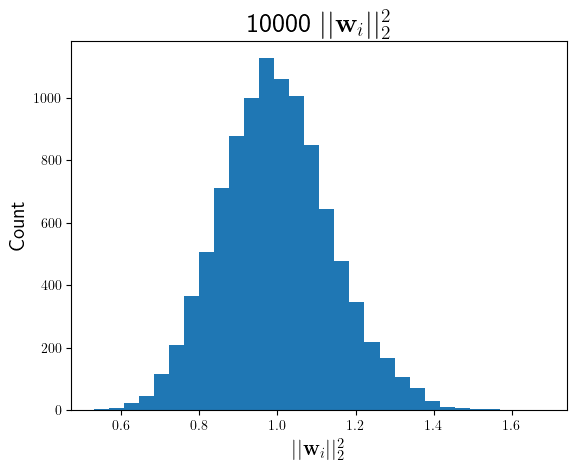

In [27]:
plt.rcParams['text.usetex'] = True
plt.hist(z,bins=30)
plt.title(r'10000 $||\mathbf{w}_i||_{2}^{2}$',size=20)
plt.xlabel('$||\mathbf{w}_i||_{2}^{2}$', size=15)
plt.ylabel('Count',size=15)

## Question 1b

Text(0, 0.5, '$k \\cdot Chi-squared_{k}(x \\cdot k)$')

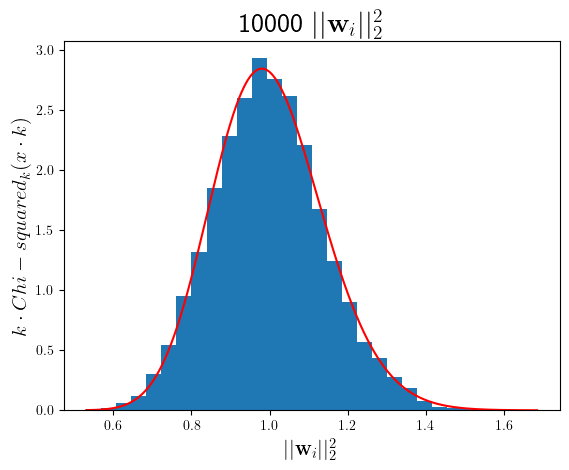

In [28]:
# q1b
x_l = min(z)
x_r = max(z)
values = np.linspace(x_l,x_r,num=10000)

density = k * chi2.pdf(values * k, df=k)
plt.hist(z,bins=30, density=True)
plt.plot(values,density, color = 'red')
plt.title(r'10000 $||\mathbf{w}_i||_{2}^{2}$',size=20)
plt.xlabel('$||\mathbf{w}_i||_{2}^{2}$', size=15)
plt.ylabel('$k \cdot Chi-squared_{k}(x \cdot k)$',size=15)
    


## Question 1c

In [37]:
l = []
l += [3]
l

[3]

In [45]:
distortions = {
    100:[],200:[],300:[],400:[],500:[],
    600:[],700:[],800:[],900:[],1000:[]
}
def is_distorted(y, eps):
    if (y < (1-eps)) or y > (1 + eps):
        return 1
    else:
        return 0
def jl_transform(x,n,k):
    G = jl_matrix(n,k)
    return G @ x
for k in distortions.keys():
    print(k)
    transforms = []
    for i in range(N):
        y = jl_transform(x=x,n=1000,k=k)
        transforms.append(np.linalg.norm(y))
    n_distortions = sum(list(map(lambda x: is_distorted(x, eps=0.05),transforms)))
    print(n_distortions)
    distortions[k] += [n_distortions]
        
    
#list(map(lambda x: is_distorted(x, eps=0.05),z))

100
4829
200
3193
300
2184
400
1558
500
1157
600
856
700
583
800
436
900
337
1000
222


In [71]:
# parallel
eps=0.05
distortions2 = {
    100:[],200:[],300:[],400:[],500:[],
    600:[],700:[],800:[],900:[],1000:[]
}
def is_distorted(y, eps=0.05):
    if (y < (1-eps)) or y > (1 + eps):
        return 1
    else:
        return 0
def jl_transform(x,n,k):
    G = jl_matrix(n,k)
    return G @ x
def count_distortions(x, k, N, n, eps):
    print(k,N, n,eps)
    distortions = 0
    for i in range(N):
        y = np.linalg.norm(jl_transform(x=x,n=1000,k=k))
        distortions += is_distorted(y,eps)
    return n_distortions
    
pool = mp.Pool(mp.cpu_count()-1)
for k in distortions.keys():
    distortions2[k] += [pool.apply(count_distortions, args=[x,k,N,n, eps])]
pool.close()
        

100 10000 1000 0.05
200 10000 1000 0.05
300 10000 1000 0.05
400 10000 1000 0.05
500 10000 1000 0.05
600 10000 1000 0.05
700 10000 1000 0.05
800 10000 1000 0.05
900 10000 1000 0.05
1000 10000 1000 0.05


In [73]:
distortions2

{100: [222],
 200: [222],
 300: [222],
 400: [222],
 500: [222],
 600: [222],
 700: [222],
 800: [222],
 900: [222],
 1000: [222]}

In [ ]:
pool.apply_async

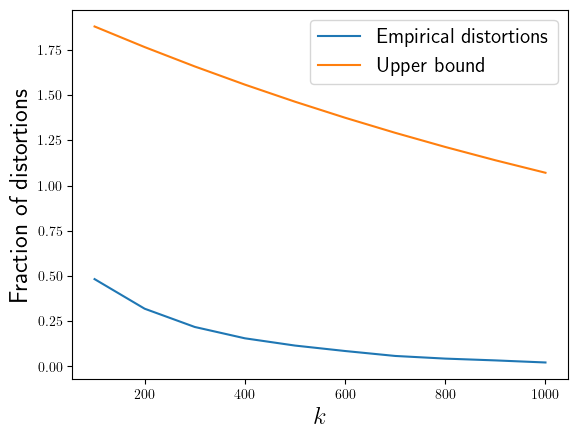

In [79]:
fontsize=18
plt.plot(list(distortions.keys()), [i[0]/10000 for i in list(distortions.values())], label='Empirical distortions')
plt.plot(list(distortions.keys()), list(map(lambda k: 2*(math.e ** ( (-k * (0.05 ** 2))/4) ) , list(distortions.keys()))), label='Upper bound')
#plt.plot(list(range(1,10000)), list(map(lambda k: 2*(math.e ** ( (-k * (0.05 ** 2))/4) ) , list(range(1,10000)))))
plt.xlabel('$k$',fontsize=fontsize)
plt.ylabel('Fraction of distortions',fontsize=fontsize)
plt.legend(fontsize=15)


### Question 1d

In [ ]:
n = 1000
x = np.random.normal(0,1,n)

In [90]:
d = 1000
epsilon=0.1
ks = range(100, 1001, 100)
n = 10
vectors = [np.random.randn(d) / np.linalg.norm(np.random.randn(d)) for _ in range(n)]
preserve_fractions = []
for k in ks:
    count_preserved = 0
    
    for _ in range(1000):
        G = jl_matrix(n=1000,k)
        preserved = True
        for i in range(n):
            for j in range(i + 1, n):
                dist_orig = np.linalg.norm(vectors[i] - vectors[j])
                dist_transformed = np.linalg.norm(G @ vectors[i] - G @ vectors[j])
                if not ((1 - epsilon) * dist_orig <= dist_transformed <= (1 + epsilon) * dist_orig):
                    preserved = False
                    break
            if not preserved:
                break
        
        if preserved:
            count_preserved += 1
    
    preserve_fraction = count_preserved / 1000
    preserve_fractions.append(preserve_fraction)




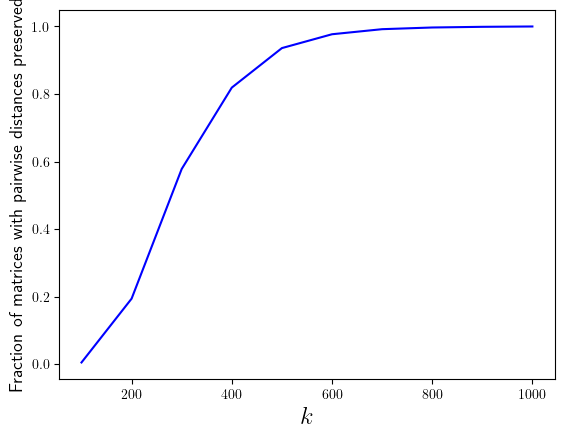

In [93]:
plt.figure()
plt.plot(ks, preserve_fractions, label="Simulated Fraction",color='blue')
plt.xlabel("$k$",fontsize=fontsize)
plt.ylabel("Fraction of matrices with pairwise distances preserved",fontsize=13)
plt.show()

## Question 2

### Question 2b

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def morris_counter(n):
    """
    Simulates the Morris counter for counting n events.
    """
    # Initialize the counter with zero
    X = 0
    for _ in range(n):
        # Flip a biased coin with probability 1/(2^X)
        if np.random.rand() < (1 / (2 ** X)):
            X += 1
    # The estimate of the count is 2^X - 1
    return (2 ** X) - 1

# Parameters
n = 5000  # Number of events
h = 10000  # Number of simulations

# Run simulations
estimated_counts = [morris_counter(n) for _ in range(h)]

# Plotting the histogram of estimated counts
plt.figure()
plt.hist(estimated_counts, bins=30)
plt.xlabel('Count of counts',fontsize=15)
plt.ylabel('Morris count',fontsize=15)
plt.show()


In [96]:
print(np.mean(estimated_counts))
print(np.std(estimated_counts))

3531.2159290565965

In [ ]:
pool.close()